# TMDB 데이터 셋에 대한 탐색적 데이터 분석(EDA)

## Library & Data

In [157]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import chart_studio
import chart_studio.plotly as py
chart_studio.tools.set_credentials_file(username='chush25', api_key='WLtFmXpIpo2uJWixzz5j')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate as cross

import warnings; warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('./movies_metadata.csv')
df.head().transpose()

C:\Users\Seonghyun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


## Dataset 이해하기
위에 있는 데이터셋은 TMDB API로 부터 추출한 것으로, 27,000명의 사용자로부터 45,000편의 영화에 대한 2600만개의 평점으로 구성되어 있다. 이 데이터셋으로 이용할 수 있는 정보들을 살펴보자. 

In [3]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

* **adult:** 성인영화인지 여부
* **belongs_to_collection:** 영화 시리즈에 대한 정보를 제공하는 String화된 Dictionary
* **budget:** 영화의 예산
* **genres:** 영화와 관련된 장르를 나열(Dictionary들의 String화된 리스트) 
* **homepage:** 홈페이지
* **id:** 영화의 ID
* **imdb_id:** 영화의 IMDB ID
* **original_language:** 영화의 원어
* **original_language:** 영화의 원자막
* **overview:** 영화의 간략한 설명
* **popularity:** 인기도 scored by TMDB
* **poster_path:** 포스터 이미지의 URL
* **production_companies:** 영화 제작 회사(String화된 list)
* **release_date:** 개봉 일자
* **revenue:** 영화 수입
* **runtime:** 상영 시간
* **spoken_languages:** 영화에 제공되는 언어(String화된 list)
* **status:** 영화 상영 여부
* **tagline:** 영화 문구
* **title:** 영화 제목
* **video:** TMDB 제공 Video 있는지
* **vote_average:** 영화 평균 평점
* **vote_count:** 사용자 평점 갯수

Production countries, Franchise, Production Companies, Original Languages, Popularity, Vote Average, Vote Count, Movie Release Dates, Movie Status, Spoken Languages, Runtime, Budget, Revenue, Genres, Cast and Crew

In [4]:
df.shape

(45466, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

데이터에는 총 45,466개의 영화와 24개의 지표(feature)가 있으며, 지표들에 NaN 값들이 있으므로 분석을 보다 용이하게 하기 위해 data cleaning 작업을 진행한다.

먼저 필요하지 않은 지표들을 제거하는 것 부터 시작한다.

In [6]:
df = df.drop(['imdb_id'], axis=1)

In [7]:
df[df['original_title'] != df['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


'original title'은 영화가 촬영된 자국어로 된 영화 제목을 가리킨다. 따라서 이 분석에서는 영어로 번역된 이름을 사용할 것이고, 'original title'을 완전히 삭제할 것이다. "original_language"를 통해 외국어로 된 영화인지 추론해 볼 수 있을 것이며, 그렇게 함으로써 가시적인 정보를 잃지 않을 것이다.

In [8]:
df = df.drop('original_title', axis=1)

In [9]:
df[df['revenue'] == 0].shape

(38052, 22)

대부분의 영화들이 "0"의 'revenue'를 가지고 있다는 것이 확인됐다. 이것은 이 영화들의 revenue에 관한 정보가 없다는 것을 나타낸다. revenue가 우리가 흥행을 예측하는데 있어서 필요한 주요 지표이기 때문에 정보가 있는 7000개의 영화에 매우 주요한 특징으로 사용할 예정이다.

In [10]:
df['revenue'] = df['revenue'].replace(0, np.nan)

'budget'부분은 unclean value들이 존재하므로, 이를 숫자 변수로 변환하여 non-numeric 값을 "NaN"으로 대체한다. 마지막으로 모든 "0"값을 "NaN"로 대체하여 예산 정보의 부재를 표시한다. 

In [11]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 22)

특정한 분석을 진행하기 위해선 몇 가지 요소를 추가해야한다.
* **year:** : 영화가 개봉된 연도
* **return:** 수익대 예산의 비율(수익/예산)

'return'은 영화의 재정적인 성공에 보다 정확한 분석을 줄 것이기 때문에 유용할 것이다. 현재 우리는 1억 원을 벌어들인 2억원 짜리 영화가 20만원을 벌어들인 5만원짜리 영화보다 더 나은지 판단할 수 없다. 따라서 'return'을 활용해 그에 대한 정보를 얻을 수 있을 것이다.

In [12]:
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(40085, 23)

현재 데이터에는 약 5000편의 'revenue'와 'budget' 비율에 관한 자료가 있다. 이것은 전체 데이터의 10%밖에 되지 않지만 충분히 유용한 분석을 진행할 수 있다.

In [13]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [14]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

데이터 안에 성인영화는 거의 없다. 따라서 "adult"요소는 분석에 불필요하므로, 삭제 가능하다.

In [15]:
df = df.drop('adult', axis=1)

In [16]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

## 탐구적 자료 분석
### 제목과 개요 Wordclouds
자주 언급되는 단어들을 통해 어느 단어가 중요한 지 파악해보자

In [17]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [18]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

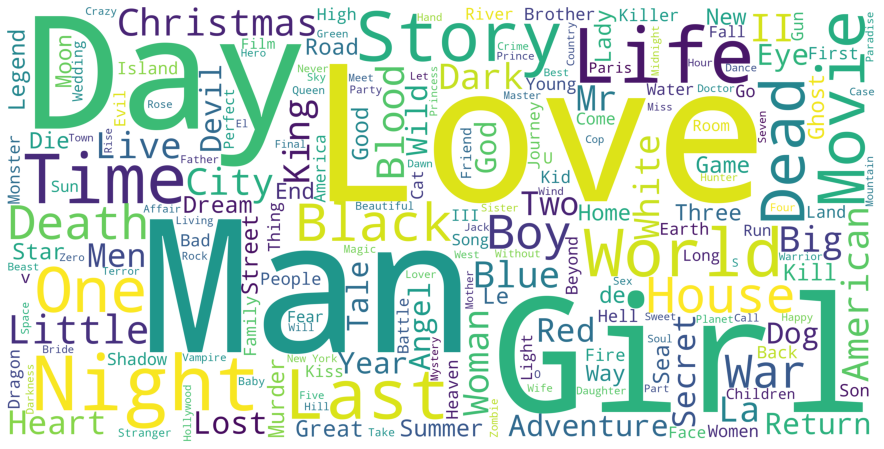

In [19]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

"Love"라는 단어가 영화 제목에서 가장 많이 쓰이는 단어였다. "Girl", "Man", "Day" 그리고 "Night" 같은 경우도 가장 흔하게 등장하는 단어들이었다. 이 결과는 영화 속 로맨스의 흔함을 잘 표현하고 있다고 생각한다.

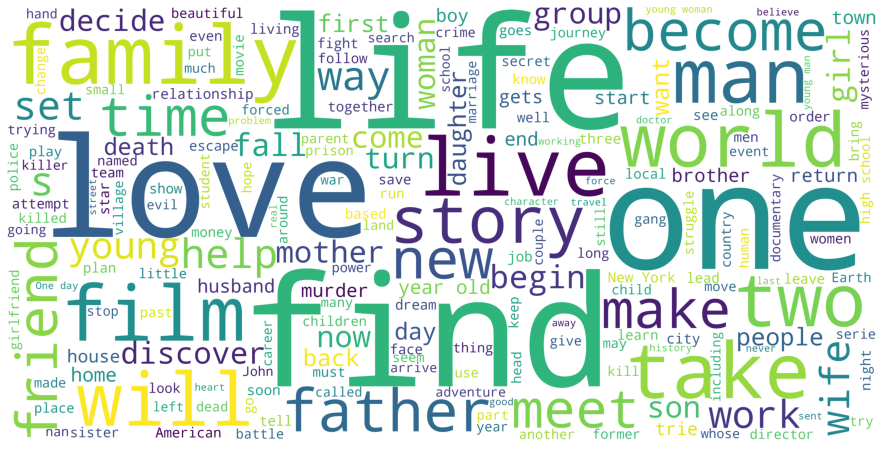

In [20]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

"Life", "One", 그리고 "Find" 역시 위에 나온 "Love", "Man", "girl"과 함께 자주 쓰이는 단어이다. 이러한 wordcloud들은 우리에게 가장 인기 있는 주제들을 꽤 잘 보여준다.

## 영화 제작 국가
데이터의 대부분 영화는 영어로 구성되어 있다. 하지만, 이 영화들은 세계 여러 곳에서 촬영되었을지도 모른다. 어느 나라가 가장 인기 있는 영화 촬영지인지 확인해 보자. 

In [21]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [22]:
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

<ipython-input-22-ae01bc924e33>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)


In [23]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


데이터가 대부분 영어로 된 영화들로 이루어져 있다는 점을 감안할 때, 미국은 영화의 가장 인기 있는 제작지이다. 유럽에서는 영국, 프랑스, 독일, 이탈리아 등이 5위 안에 들면서 매우 인기 있는 곳이다. 일본과 인도는 아시아에서 가장 인기 있는 국가들이다.

## 프랜차이즈 영화(시리즈)

In [24]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

<ipython-input-24-2ba282283898>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)


In [25]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

### 최고의 수익을 올리는 프랜차이즈 영화

In [26]:
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


해리포터 시리즈는 8편의 영화에서 77억7,700만 달러 이상을 벌어들인 가장 성공적인 영화 프랜차이즈다. 스타워즈 시리즈도 8편에서 74억300만 달러로 2위를 차지했다. 제임스 본드 시리즈는 세 번째지만, 리스트에 있는 다른 영화들에 비해 시리즈 수가 훨씬 더 많고, 이에 따라 평균 총액이 훨씬 적다.

### 가장 성공적인 프랜차이즈 영화(by average gross)  

영화 프랜차이즈의 성공을 가늠하기 위해 영화당 평균 수입를 사용할 것이다. 하지만, 인플레이션을 감안한다면 이 지표는 엄격한 측정 기준이 아니다. 따라서 수입 통계는 최근에 나온 시리즈(프랜차이즈)를 선호하는 경향이 있을 것이다.

In [27]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


어벤져스 시리즈는 역대 가장 성공적인 프랜차이즈다. 아바타가 그 뒤를 잇고 있다.

### 가장 오래 진행 중인 프랜차이즈  

오랜 시간동안 가장 많은 수의 영화를 생산해온 프랜차이즈에 대해 살펴보자. 이 지표는 인플레이션에 영향을 받지 않는다는 면에서 눈 여겨볼만한 지표이다. 하지만 이것이 성공적인 영화 프랜차이즈들이 곧 더 많은 영화를 갖는다는 것을 의미하지는 않는다.

In [28]:
fran_pivot.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


제임스 본드 시리즈는 26편 이상의 영화가 개봉된 역대 최대 규모의 프랜차이즈다.

### 제작사

In [29]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [30]:
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

<ipython-input-30-e9a2e6366369>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)


In [31]:
com_df = df.drop('production_companies', axis=1).join(s)

In [32]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

### 가장 수입이 많은 제작사

In [33]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78
Dune Entertainment,1.500379e+10,2.419966e+08,62


워너 브라더스는 500여 편의 영화에서 무려 635억 달러를 벌어들인 역대 최고 수익의 제작사 중 하나이다. 유니버설 픽처스와 파라마운트 픽처스는 각각 550억 달러, 480억 달러의 매출로 2위와 3위를 차지하고 있다.

### 가장 성공적인 제작사

적어도 15개 이상의 영화를 제작한 제작사 중 가장 성공적인 제작사는 어디일지 알아보자.

In [34]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19
Legendary Pictures,1.346866e+10,3.367166e+08,40


레볼루션 썬 스튜디오가 평균적으로 가장 많은 수입을 벌어들였다. 그 외에도 우리에게 익숙한 21세기 폭스, 마블 스튜디오 같은 제작사가 나열되었다.

### 원어(Original Language)

앞서 지켜본 결과, 대부분의 언어는 영어로 판별 됐다. 그 외 언어는 어떤 것들이 사용됐는지 살펴보자.

In [35]:
df['original_language'].drop_duplicates().shape[0]

93

In [36]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


이 데이터 셋에는 93개 이상의 언어가 있다. 예상대로 영어가 압도적으로 많은 비중을 차지한다. 큰 차이로 프랑스와 이탈리아 영화는 각각 2위와 3위를 차지했다. Bar plot의 형태로 가장 인기 있는 언어(영어 제외)를 확인해 보자.

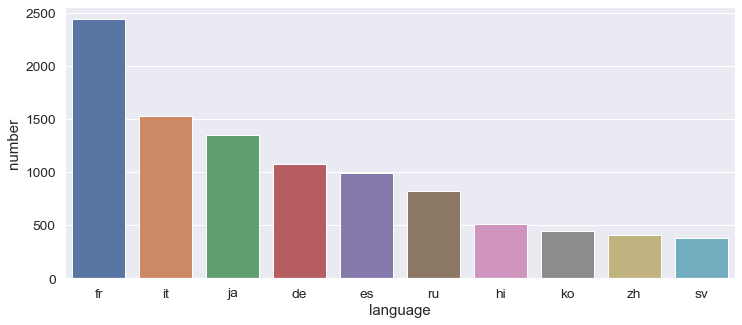

In [37]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

### 인기도, 투표 평균, 투표 수(Popularity, Vote Average, Vote Count)

이 섹션에서는 TMDB 사용자가 제공하는 메트릭스를 다룰 것이다. 인기, 투표 평균, 투표 수의 기능에 대해 더 깊이 이해하고 예산과 세입과 같은 다른 수치적 특징뿐만 아니라 그들 사이의 관계를 추론해보겠다.

In [38]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [39]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

각 요약 통계량과 분포를 하나씩 살펴보자.

In [40]:
df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

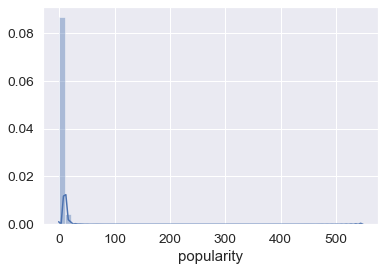

In [41]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

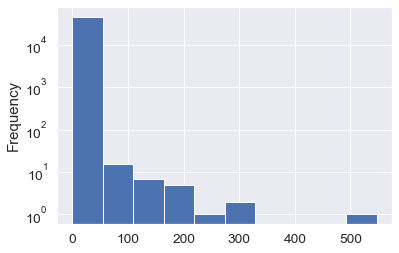

In [42]:
df['popularity'].plot(logy=True, kind='hist')

인기도 점수는 평균이 2.9로, 극도로 치우친 것처럼 보이지만 최대값은 평균보다 거의 1800% 높은 547에 이른다. 그러나 표에서도 알 수 있듯이 거의 모든 영화의 인기 점수는 10점 미만(75%는 약 3.7점)이다.

### 인기도 점수 기반 가장 인기 있는 영화

In [43]:
df[['title', 'popularity']].sort_values('popularity', ascending=False).head(10)

,title,popularity
30700,Minions,547.488298
33356,Wonder Woman,294.337037
42222,Beauty and the Beast,287.253654
43644,Baby Driver,228.032744
24455,Big Hero 6,213.849907
26564,Deadpool,187.860492
26566,Guardians of the Galaxy Vol. 2,185.330992
14551,Avatar,185.070892
24351,John Wick,183.870374
23675,Gone Girl,154.801009


미니언즈는 TMDB 인기도 점수에서 가장 높은 점수를 받은 영화다.원더우먼과 미녀와 야수, 두 편의 매우 성공적인 여성 중심 영화들이 각각 2위와 3위를 차지하고 있다.

In [44]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

인기 점수와 마찬가지로 투표 수 분포는 중위수 득표수가 10표 미만으로 극도로 왜곡되어 있다. 한 편의 영화가 얻은 가장 많은 투표수는 1만4075표다. 그래도 일단은 웹사이트에서 어떤 영화가 가장 많이 투표됐는지 확인해보자.

### 최다 득표 영화

In [45]:
df[['title', 'vote_count']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count
15480,Inception,14075.0
12481,The Dark Knight,12269.0
14551,Avatar,12114.0
17818,The Avengers,12000.0
26564,Deadpool,11444.0
22879,Interstellar,11187.0
20051,Django Unchained,10297.0
23753,Guardians of the Galaxy,10014.0
2843,Fight Club,9678.0
18244,The Hunger Games,9634.0


인셉션과 다크나이트라는 희대의 명작이 차트 상위권을 차지하고 있다.

In [46]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

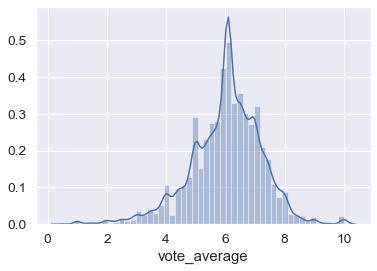

In [47]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

TMDB 유저는 평점에 매우 박한 것으로 보인다. 평균 등급은 10점 만점에 5.6점에 불과하다. 영화의 절반은 평점이 6점 이하가 된다. TMDB에 따라 가장 평가자들에게 호평을 받은 영화가 무엇인지 확인해 보자. 2000표 이상(최상위 250표 선정 시 IMDB의 5000표 기준과 유사)인 영화만 고려하겠다.

### 비평가들의 찬사를 받은 영화들

In [48]:
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count
314,The Shawshank Redemption,8.5,8358.0
834,The Godfather,8.5,6024.0
2211,Life Is Beautiful,8.3,3643.0
5481,Spirited Away,8.3,3968.0
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0
1176,Psycho,8.3,2405.0
2843,Fight Club,8.3,9678.0
1178,The Godfather: Part II,8.3,3418.0
12481,The Dark Knight,8.3,12269.0
292,Pulp Fiction,8.3,8670.0


쇼생크 탈출과 대부는 TMDB 데이터베이스에서 비평가들에게 가장 호평을 받은 두 영화다.

인기와 투표 수가 실질적인 관계를 갖는가? 다시 말해, 이 두 가지 변수 사이에 강한 양의 상관관계가 있는가? 그들의 관계를 산점도(scatter plot)의 형태로 시각화하자.

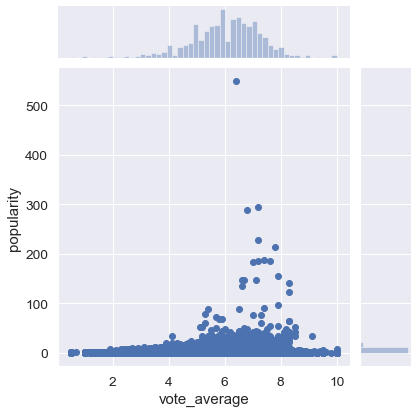

In [49]:
sns.jointplot(x='vote_average', y='popularity', data=df)

놀랍게도 앞서 언급한 두 가지 수량의 피어슨 계수는 0.097으로, 구체적인 상관관계가 없음을 시사한다. 즉, 인기와 투표는 평균적이고 독립적 이다.

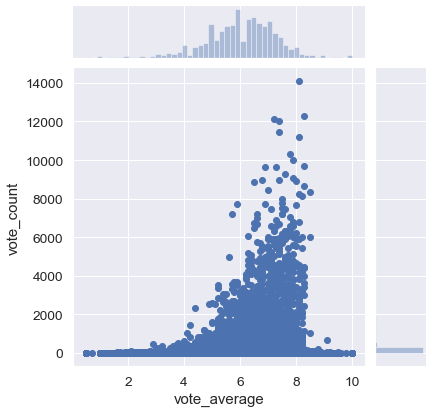

In [50]:
sns.jointplot(x='vote_average', y='vote_count', data=df)

투표 수와 투표 평점 사이에도 아주 작은 상관관계가 있다. 특정 영화에 대한 많은 표가 반드시 영화가 좋다는 것을 의미하지는 않는다.

### 영화 개봉 일자

개봉 일자는 종종 영화의 성공과 수익을 결정하는데 매우 중요한 역할을 할 수 있다. 이 섹션에서는 연도, 월 및 요일의 측면에서 개봉 일자에 대한 통찰력을 얻도록 노력하겠다. 먼저 개봉일이 있는 각 영화의 월별 날짜를 뽑아보자.

In [51]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [52]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [53]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [54]:
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

이것들을 토대로 가장 인기 있고 성공적인 달과 요일을 확인해보자.

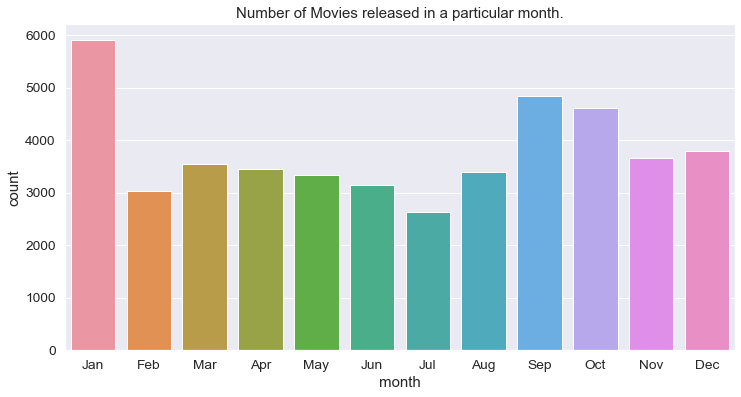

In [55]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order)

영화 개봉과 관련해서는 1월이 가장 인기 있는 것으로 보인다. 헐리우드쪽에서는 1월이 B급 영화가 수십 편 개봉되는 '덤핑의 달'로도 알려져 있다.

그렇다면 흥행률이 높은 블럭버스터 영화는 몇 월에 개봉되는가? 이 질문에 답하기 위해서는 1억 달러를 초과해 만든 모든 영화를 고려하고, 매달의 평균 수입을 산출해야 한다.

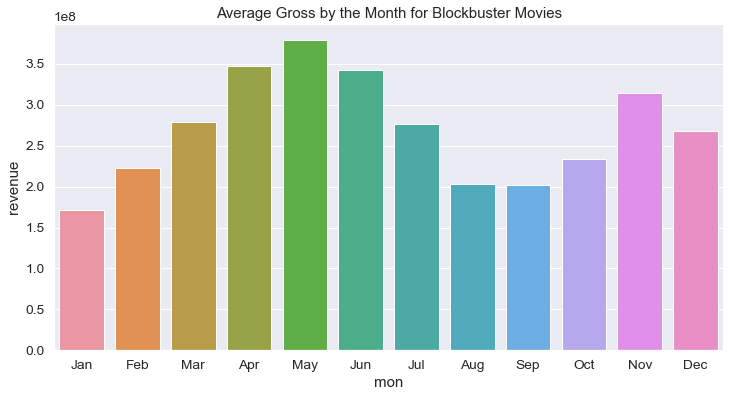

In [56]:
month_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

4월, 5월, 6월의 평균 총액이 높은 것을 확인할 수 있다. 이는 블록버스터 영화가 보통 아이들이 학교를 비우고 부모가 방학하는 여름에 개봉되기 때문에, 관객들이 가처분소득을 유흥비로 쓸 가능성이 높기 때문으로 예측된다.

그렇다면 특정 달이 다른 달들보다 더 성공하는 경향이 있는것인가? 수익과 월 사이의 box plot을 시각화하여 확인해보자.

(0.0, 12.0)

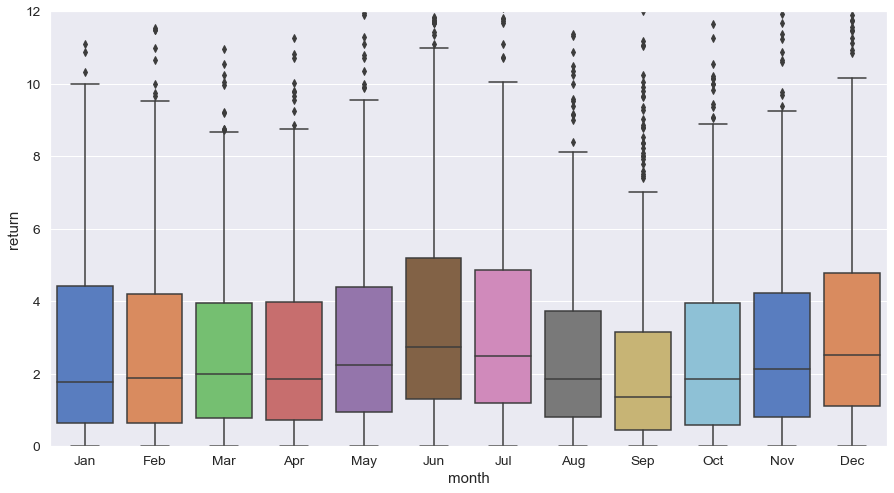

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='month', y='return', data=df[df['return'].notnull()], palette="muted", ax =ax, order=month_order)
ax.set_ylim([0, 12])

6월과 7월은 다른 달들에 비해 중간 수익률이 높은 경향이 있다. 9월은 앞서 언급한 지표에서 가장 덜 성공적인 달이다. 6월과 7월 영화의 성공은 여름 휴가 기간의 덕으로 생각해 볼 수 있고, 9월은 보통 학교/대학 학기의 시작이므로 영화 소비가 약간 줄어든다고 생각해 볼 수 있다.

이제 우리가 월별로 파악했던 것 처럼 가장 인기 있는 요일들을 살펴보자.

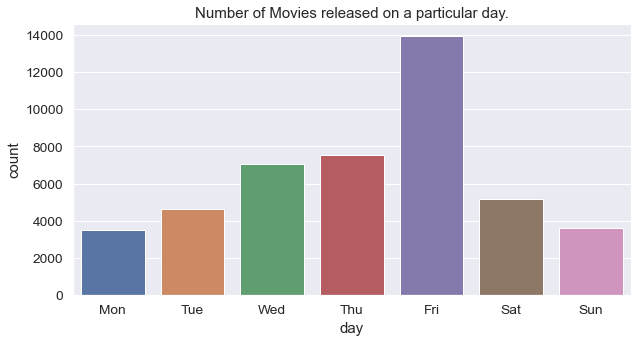

In [58]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=df, order=day_order)

금요일은 확실히 영화 개봉일 중 가장 인기 있는 요일이다. 통상 주말의 시작을 의미하는 점을 감안하면 이해할 만하다. 일요일과 월요일은 가장 인기 없는 날이며 이는 앞서 언급한 이유의 연장선이라고 볼 수 있다.

### 해마다 제작되는 영화의 수  

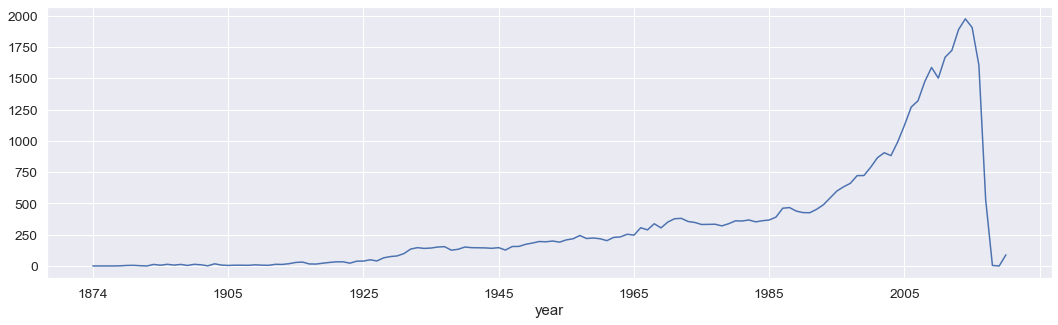

In [59]:
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

1990년대부터 영화의 수가 급격히 증가하고 있다. 그러나, 이 데이터 셋에 최근의 영화들이 샘플링 목적을 위해 과도하게 몰렸을 가능성이 있기 때문에 이것에 큰 의미를 두지는 않을 것이다.

그렇다면 연도별로 영화 개봉을 나타내는 히트맵을 구성해보자. 이것은 어느 달에 영화에 대한 관심이 뜨거운지 아닌지를 잘 알려 줄 것이다.

In [60]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [61]:
df_21 = df.copy()
df_21['year'] = df_21[df_21['year'] != 'NaT']['year'].astype(int)
df_21 = df_21[df_21['year'] >=2000]
hmap_21 = pd.pivot_table(data=df_21, index='month', columns='year', aggfunc='count', values='title')
hmap_21 = hmap_21.fillna(0)

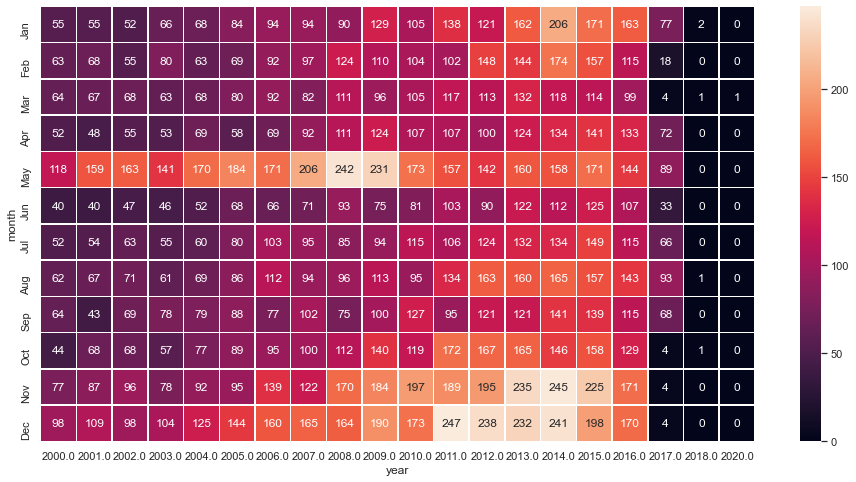

In [62]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(hmap_21, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)

In [63]:
sns.set(font_scale=1.25)

### 사용된 언어  
영화 내에서 사용된 언어의 수가 영화의 성공에 영향을 미치는가? 이를 위해 영화에서 사용되는 언어의 수를 변환해보자.

In [64]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [65]:
df['spoken_languages'].value_counts()

1     33736
2      5371
0      3835
3      1705
4       550
5       178
6        62
7        14
8         6
9         5
19        1
13        1
12        1
10        1
Name: spoken_languages, dtype: int64

대부분의 영화는 영화 내에서 사용되는 언어가 한 개에 불과하다. 영화에서 사용되는 언어가 가장 많은 언어의 개수는 19개이다. 10개 이상의 언어가 사용된 영화들을 살펴보자.

In [66]:
df[df['spoken_languages'] >= 10][['title', 'year', 'spoken_languages']].sort_values('spoken_languages', ascending=False)

,title,year,spoken_languages
22235,Visions of Europe,2004,19
35288,The Testaments,2000,13
14093,To Each His Own Cinema,2007,12
8789,The Adventures of Picasso,1978,10


C:\Users\Seonghyun\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


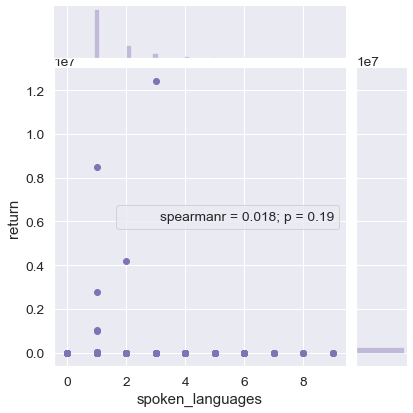

In [67]:
sns.jointplot(x="spoken_languages", y="return", data=df, stat_func=stats.spearmanr, color="m")

스피어맨 계수는 0.018로 두 변수의 상관관계가 없음을 나타낸다.

### 상영 시간  

In [68]:
df['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

영화의 평균 길이는 약 1시간 30분이다. 이 데이터 셋에서 가장 긴 영화는 무려 1256분(또는 20시간)이나 된다.

In [69]:
df['runtime'] = df['runtime'].astype('float')

우리는 대부분의 영화가 5시간(300분)도 안 된다는 것을 알고 있다. 이 주류 영화들의 분포도 그려보자.

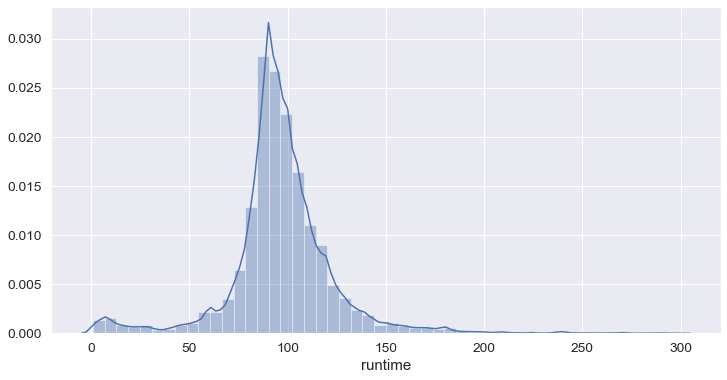

In [70]:
plt.figure(figsize=(12,6))
sns.distplot(df[(df['runtime'] < 300) & (df['runtime'] > 0)]['runtime'])

상영 시간과 return 사이에 의미 있는 관계가 있는지 알아보자.

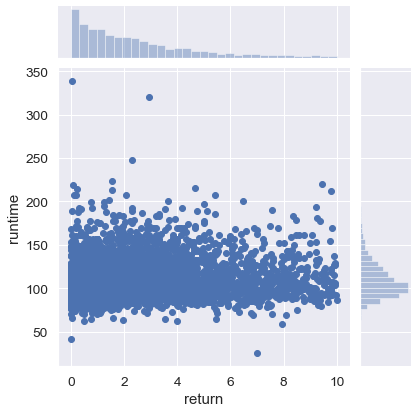

In [71]:
df_mat = df[(df['return'].notnull()) & (df['runtime'] > 0) & (df['return'] < 10)]
sns.jointplot('return', 'runtime', data=df_mat)
plt.show()

두 변수 사이에는 관계가 있는 것 처럼 보인다. 영화의 지속시간은 그 영화의 성공과는 무관하지만, 더 긴 영화는 보통 더 많은 예산을 필요로 할 것이다. 정말 그런 것인지 알아보자.

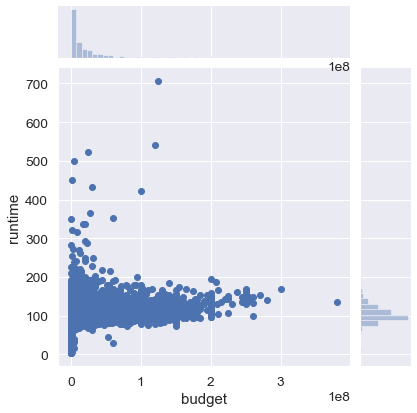

In [72]:
df_mat = df[(df['budget'].notnull()) & (df['runtime'] > 0)]
sns.jointplot('budget', 'runtime', data=df_mat)
plt.show()

두 가지 변수는 예상했던 것보다 훨씬 더 약한 상관관계를 가지고 있다. 생각해보면 영화의 장르가 예산에 훨씬 더 큰 영향을 미치는 경향이 있다. 3시간짜리 예술 영화는 90분짜리 공상과학 영화보다 예산이 훨씬 덜 들어갈 것이다.

다음으로 1890년대부터 2017년대까지 시간을 통해 영화의 평균 길이를 확인해 보자. 당시 영화 제작자들이 적절하다고 판단했던 영화의 길이를 확인해보면 흥미로울 것이다.

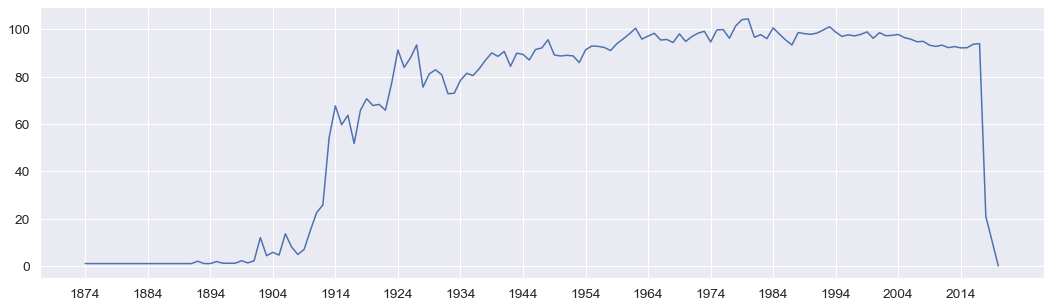

In [173]:
plt.figure(figsize=(18,5))
year_runtime = df[df['year'] != 'NaT'].groupby('year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.xticks(np.arange(1874, 2024, step = 10.0))
plt.show()

우리는 1914년부터 영화가 60분대를 기록하기 시작했다는 것을 확인했다. 1924년부터 영화들은 90분정도의 러닝타임을 유지했으며그 이후로 거의 일정하게 유지되었다.

마지막으로 역대 가장 길고 짧은 영화를 살펴보자.

### 가장 짧은 영화

In [74]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime').head(10)

,runtime,title,year
35146,1.0,La Vague,1891
36577,1.0,Champs de Mars,1900
36576,1.0,Palace of Electricity,1900
44965,1.0,"Luis Martinetti, Contortionist",1894
42357,1.0,A Gathering of Cats,2007
36575,1.0,Eiffel Tower from Trocadero Palace,1900
36574,1.0,Panorama of Eiffel Tower,1900
44714,1.0,The Infernal Caldron,1903
19244,1.0,The Kiss,1896
44646,1.0,The Vanishing Lady,1896


이 목록에 있는 모든 영화들이 1890년대 말과 20세기 초에 촬영됐다. 이 영화들은 모두 1분짜리였다.

### 가장 긴 영화

In [75]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,year
24178,1256.0,Centennial,1978
40938,1140.0,Baseball,1994
19965,1140.0,Jazz,2001
13767,931.0,Berlin Alexanderplatz,1980
13953,925.0,Heimat: A Chronicle of Germany,1984
27855,900.0,The Story of Film: An Odyssey,2011
26682,877.0,Taken,2002
19158,874.0,The War,2007
34667,840.0,The Roosevelts: An Intimate History,2014
34732,840.0,Seventeen Moments in Spring,1973


위 작품들은 거의 다 미니시리즈(드라마 형식)이기 때문에 큰 의미를 부여할 수 없을 것 같다.

### 예산  
예산은 인플레이션 등 다양한 요소로 왜곡될 수 있음에도 불구하고 영화 수익과 성공을 예측하는 데 있어 가장 중요한 요소 중 하나이다. 우선, 예산에 대한 통계를 요약해보자.

In [76]:
df['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

영화의 평균 예산은 2160만 달러인 반면 중앙값은 800만 달러로 훨씬 적다. 이것은 평균이 특이값들에 의해 영향을 받는다는 것을 강하게 시사한다.

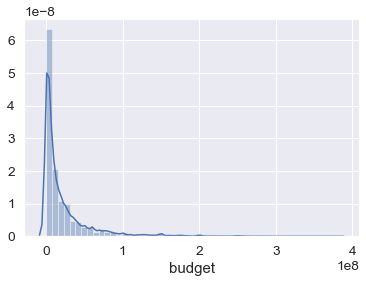

In [77]:
sns.distplot(df[df['budget'].notnull()]['budget'])

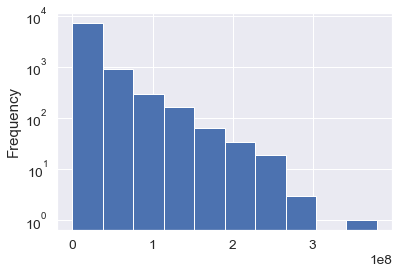

In [78]:
df['budget'].plot(logy=True, kind='hist')

영화예산의 분포는 기하급수적인 감소를 보여준다. 영화의 75% 이상이 2500만 달러보다 적은 예산을 가지고 있다. 다음으로, 역대 가장 비싼 영화와 그들이 만들어낸 수입과 수익을 살펴보자.

### 예산이 가장 많이 들어간 영화

In [79]:
df[df['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878,2011
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015
11067,Superman Returns,270000000.0,3.910812e+08,1.448449,2006
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701,2017
16130,Tangled,260000000.0,5.917949e+08,2.276134,2010
18685,John Carter,260000000.0,2.841391e+08,1.092843,2012
11780,Spider-Man 3,258000000.0,8.908716e+08,3.452991,2007
21175,The Lone Ranger,255000000.0,8.928991e+07,0.350157,2013
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,3.833600,2013


2편의 캐리비안 해적 영화가 3억 달러가 넘는 엄청난 예산으로 이 리스트에서 1위를 차지하고 있다. 가장 비싼 상위 10개 영화들은 투자액의 35% 미만을 회수해 2억5500만 달러의 예산으로 9000만 달러를 벌어들인 론 레인저를 제외하고는 모두 투자 수익을 올렸다.

그렇다면 예산과 수익의 상관관계가 얼마나 강한지 알아보자.

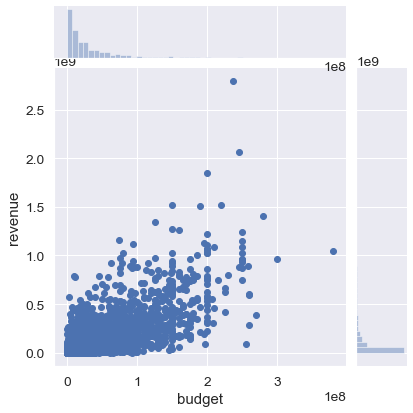

In [80]:
sns.jointplot(x='budget',y='revenue',data=df[df['return'].notnull()])

두 변수 사이의 pearson r 값은 매우 강한 상관관계를 나타낸다.

### Revenue(return과 구분하기 위해 명시)
고려할 마지막 변수는 revenue(수익)이다. Revenue는 아마도 영화와 관련된 가장 중요한 숫자로 된 변수일 것이다. Revenue에 관한 분석은 예산과 비슷하게 다시 한번 요약 통계를 연구하는 것으로 시작해보자.

In [81]:
df['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

영화의 평균 총 수입은 6,870만 달러인 반면, 총액의 중간값은 1,680만 달러로 훨씬 낮은 편이어서 수입의 편향성을 시사하고 있다. 역대 최고 수입을 올린 영화가 놀랍게도 27억8000만 달러를 벌어들인 반면, 한 영화가 만들어낸 최저 수입은 1달러에 불과하다.

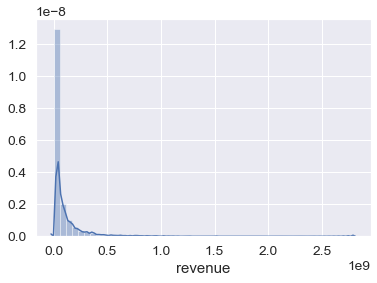

In [82]:
sns.distplot(df[df['revenue'].notnull()]['revenue'])

수입의 분포도 예산과 마찬가지로 기하급수적인 감소를 겪는다. 또한 두 변수가 강하게 상관관계가 있다는 것을 발견했다. 이제 역대 가장 높은 수익을 내는 영화와 가장 적은 수익을 올리는 영화들을 알아보자.

### 가장 높은 수입을 얻은 영화

In [174]:
gross_top = df[['title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
pd.set_option('display.max_colwidth', 100)
HTML(gross_top.to_html(escape=False))

,title,budget,revenue,year
14617,Avatar,237000000.0,2.787965e+09,2009.0
26640,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015.0
1647,Titanic,200000000.0,1.845034e+09,1997.0
17890,The Avengers,220000000.0,1.519558e+09,2012.0
25155,Jurassic World,150000000.0,1.513529e+09,2015.0
28914,Furious 7,190000000.0,1.506249e+09,2015.0
26643,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015.0
17509,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011.0
22182,Frozen,150000000.0,1.274219e+09,2013.0
42298,Beauty and the Beast,160000000.0,1.262886e+09,2017.0


In [84]:
pd.set_option('display.max_colwidth', 50)

이 수치들은 인플레이션에 대해 조정되지 않았다. 따라서, 상위 10위 안에 든 영화들은 최근의 영화들로 불균형하게 이루어져 있다. 영화가 벌어들이는 revenue를 이해하기 위해, 몇 년 동안 최대 revenue를 표로 나타내보자.

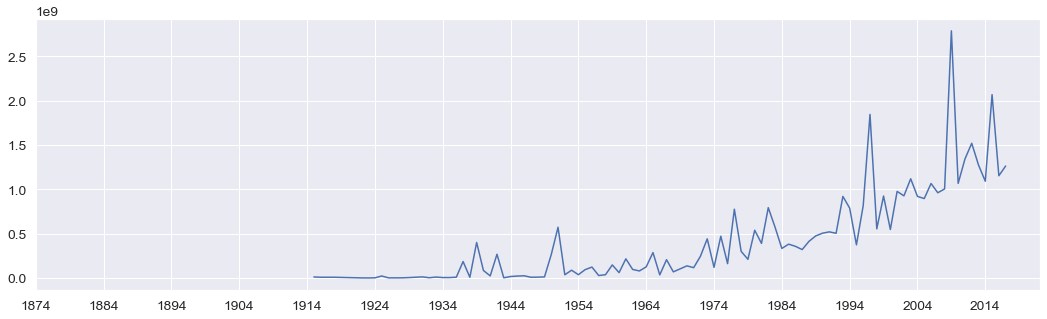

In [175]:
plt.figure(figsize=(18,5))
year_revenue = df[(df['revenue'].notnull()) & (df['year'] != 'NaT')].groupby('year')['revenue'].max()
plt.plot(year_revenue.index, year_revenue)
plt.xticks(np.arange(1874, 2024, step = 10.0))
plt.show()

이 수치에서 알 수 있듯이, revenue의 최대 총액은 지난 몇 년간 꾸준히 증가해왔다. 영화계는 타이타닉의 개봉으로 1997년에 10억 달러 기록을 깼다. 아바타로 20억 달러를 돌파하는 데는 12년이 더 걸렸다. 이 두 영화 모두 제임스 카메론이 감독했다.

### Returns(Revenue/Budgets)

#### 가장 성공한 영화들

In [86]:
df[(df['return'].notnull()) & (df['budget'] > 5e6)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return', ascending=False).head(10)

,title,budget,revenue,return,year
1065,E.T. the Extra-Terrestrial,10500000.0,792965326.0,75.520507,1982
256,Star Wars,11000000.0,775398007.0,70.490728,1977
1338,Jaws,7000000.0,470654000.0,67.236286,1975
1888,The Exorcist,8000000.0,441306145.0,55.163268,1973
352,Four Weddings and a Funeral,6000000.0,254700832.0,42.450139,1994
834,The Godfather,6000000.0,245066411.0,40.844402,1972
4492,Look Who's Talking,7500000.0,296000000.0,39.466667,1989
24258,Annabelle,6500000.0,255273813.0,39.272894,2014
1056,Dirty Dancing,6000000.0,213954274.0,35.659046,1987
1006,The Sound of Music,8200000.0,286214286.0,34.904181,1965


#### 가장 실패한 영화들

In [87]:
df[(df['return'].notnull()) & (df['budget'] > 5e6) & (df['revenue'] > 10000)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return').head(10)

,title,budget,revenue,return,year
11159,Chaos,20000000.0,10289.0,0.000514,2005
19027,5 Days of War,20000000.0,17479.0,0.000874,2011
21034,Special Forces,10000000.0,10759.0,0.001076,2011
25732,Foodfight!,65000000.0,73706.0,0.001134,2012
38388,Term Life,16500000.0,21256.0,0.001288,2016
19505,Laurence Anyways,9500000.0,12250.0,0.001289,2012
12038,The Good Night,15000000.0,20380.0,0.001359,2007
3966,Cherry 2000,10000000.0,14000.0,0.001400,1987
22097,Twice Born,13000000.0,18295.0,0.001407,2012
5651,All The Queen's Men,15000000.0,23000.0,0.001533,2001


이러한 분석들을 통해 상관 행렬을 구성해보자.(상관 분석)

In [88]:
df['year'] = df['year'].replace('NaT', np.nan)

In [89]:
df['year'] = df['year'].apply(clean_numeric)

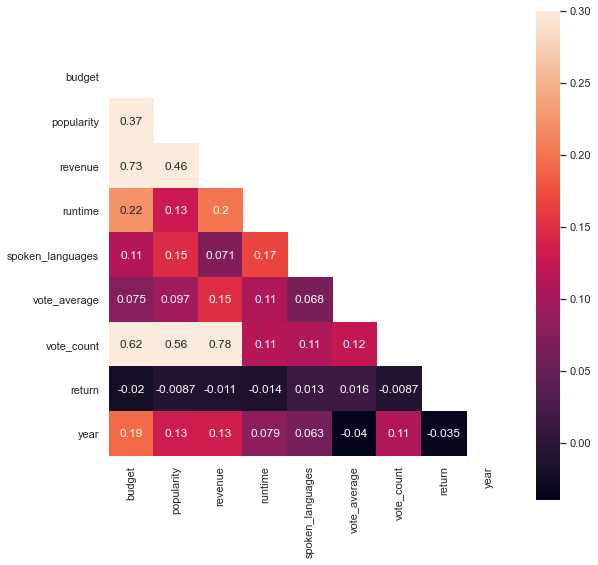

In [90]:
sns.set(font_scale=1)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

In [91]:
sns.set(font_scale=1.25)

#### 큰 상관관계를 가진 요소들  

1. Revenue & vote count
2. Revenue & budget
3. Budget & vote count
4. Popularity & vote count
5. Revenue & popularity
6. Budget & popularity

### 장르

In [92]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [93]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

<ipython-input-93-9d543da99f26>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)


In [94]:
gen_df = df.drop('genres', axis=1).join(s)

In [95]:
gen_df['genre'].value_counts().shape[0]

32

TMDB는 45,000편의 영화를 32개의 장르로 정의하고 있다. 이제 영화에서 가장 흔하게 등장하는 장르를 살펴보자.

In [96]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


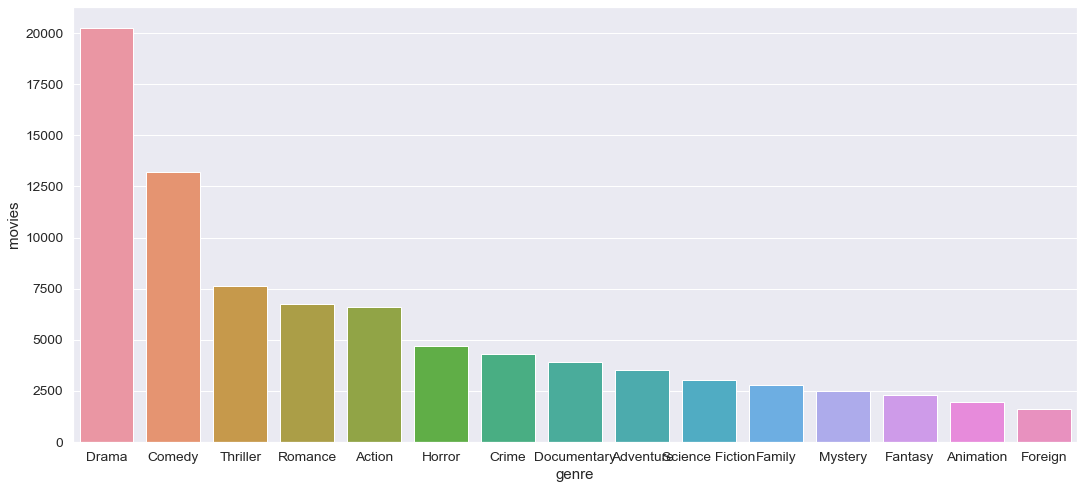

In [97]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

거의 절반에 가까운 영화는 드라마 영화로, 드라마 장르는 가장 흔한 장르라고 볼 수 있다. 코미디는 영화의 25%정도로 1위와는 차이가 꽤 나는 먼 2위로 선정되었다. 상위 10위 안에 든 다른 주요 장르로는 액션, 호러, 범죄, 미스터리, SF, 애니메이션, 판타지 등이 있다.

다음 질문으로 답하고 싶은 것은 전 세계 영화 장르 점유율의 트렌드다. 공상과학 영화에 대한 수요가 증가했는가? 특정 연도의 애니메이션 영화 점유율이 불균형한가? 알아보자!

2000년 이후의 동향과 가장 인기 있는 장르 15위 안에 드는 테마만 고려할 것이다. 이 분석에서 다큐멘터리, 가족 및 외국 영화를 제외할 것이다.

In [98]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 'Mystery', 'Fantasy', 'Mystery', 'Animation']

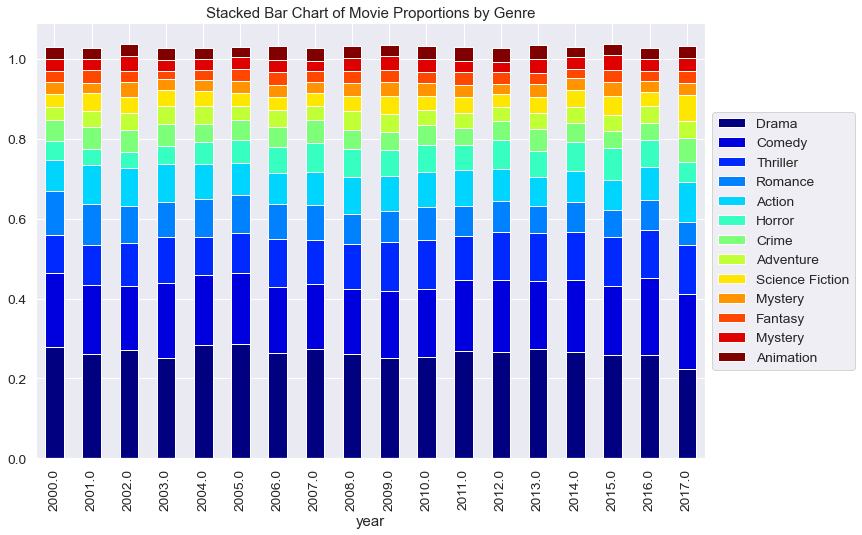

In [99]:
pop_gen_movies = gen_df[(gen_df['genre'].isin(genres)) & (gen_df['year'] >= 2000) & (gen_df['year'] <= 2017)]
ctab = pd.crosstab([pop_gen_movies['year']], pop_gen_movies['genre']).apply(lambda x: x/x.sum(), axis=1)
ctab[genres].plot(kind='bar', stacked=True, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

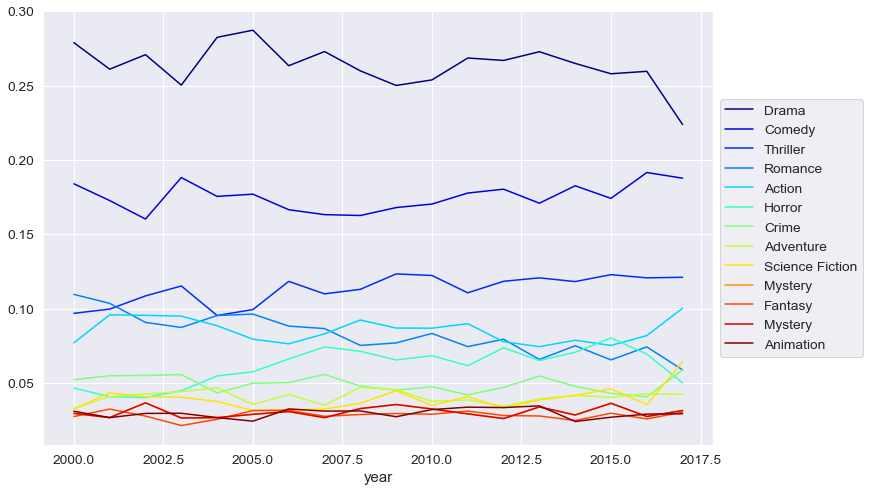

In [100]:
ctab[genres].plot(kind='line', stacked=False, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

각 장르의 영화의 비율은 드라마를 제외하고 금세기 초부터 상당히 일정하게 유지되어 왔다. 드라마 영화의 비중이 5% 이상 떨어졌다. 스릴러 영화는 점유율이 소폭 상승했다.

그렇다면 어떤 장르가 특히 다른 장르보다 더 성공적일까?. 예를 들어, 우리는 SF와 판타지 영화가 다른 장르보다 더 많은 수익을 가져다 줄 것으로 기대해야 하지만, 그들의 예산으로 미루어 보았을때, 그것들이 그만큼 성공적인 것으로 증명되는가? 이 질문에 답하기 위해 두 개의 Box Plot을 시각화할 것이다. 하나는 장르 대 수익이고 다른 하나는 수익 대 수익이다.

In [101]:
violin_genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Science Fiction', 'Fantasy', 'Animation']
violin_movies = gen_df[(gen_df['genre'].isin(violin_genres))]

<Figure size 1296x576 with 0 Axes>

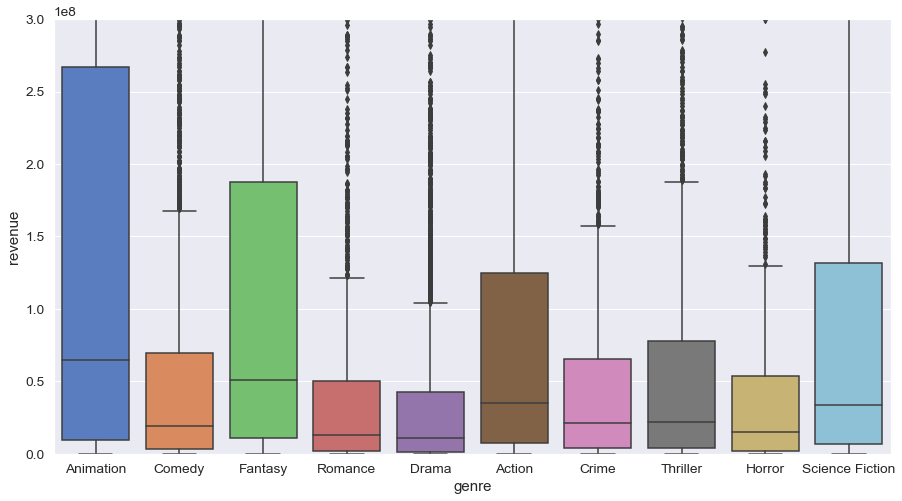

In [102]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='revenue', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 3e8])
plt.show()

애니메이션 영화는 범위가 가장 클 뿐만 아니라 수익의 중간값도 모든 장르 중 가장 높은 값을 가지고 있다. 판타지와 공상과학은 각각 수익의 중간값에서 2위와 3위를 차지했다.

<Figure size 1296x576 with 0 Axes>

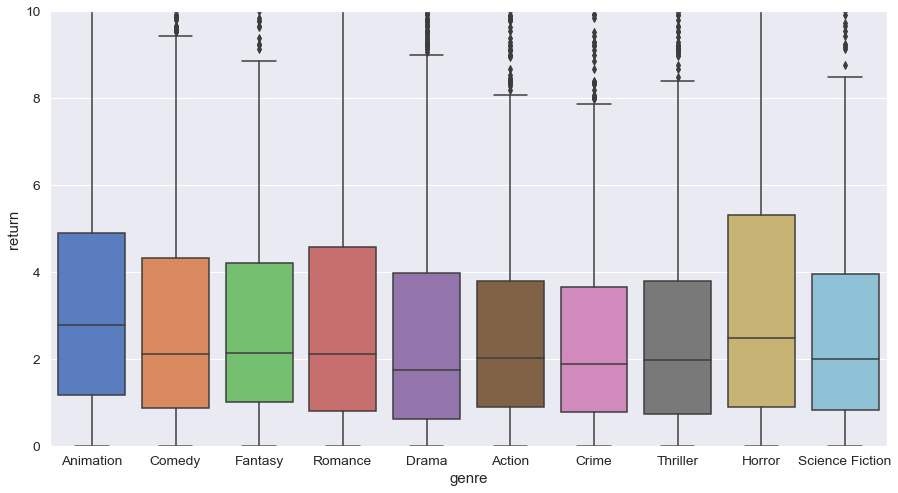

In [103]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='return', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 10])
plt.show()

박스 플롯을 보면 애니메이션 영화가 평균적으로 가장 높은 수익을 내는 경향이 있다. 호러 무비 또한 편차가 있지만, 괜찮은 수익을 얻을 수 있을 것으로 보인다. 이는 공포영화가 판타지 무비에 비해 저예산이지만 예산에 비해 매우 높은 수익을 낼 수 있다는 특성 때문일 것으로 보인다.

### 출연진과 제작진  
이제 영화의 출연진과 제작진을 살펴보자. 이 정보는 기존에 사용하던 파일에 들어있지 않아서 credits라는 새로운 파일을 불러와서 실행할 것이다.

In [104]:
credits_df = pd.read_csv('./credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


### Credits 데이터 셋
* **cast**: 출연진 이름과 해당 문자로 구성된 string화된 dictionary 목록.  
* **crew**: 제작진 이름과 그들이 수행한 역할로 구성된 dictionary 목록.
* **id**: 영화의 TMDB ID.

데이터를 활용하기 위해선 TMDB Movie ID에 크레딧 데이터 프레임을 사용하여 원본 영화 메타데이터 데이터 프레임을 왼쪽으로 조인 해야한다. 이 조인을 수행하기 전에 메인 데이터프레임의 ID 열이 깨끗하고 정수인지 확인해야 한다. 이를 위해 ID의 정수 변환을 시도하고 예외가 발생하면 NaN으로 대체한다. 그런 다음 데이터 프레임에서 이러한 행을 삭제할 것이다.

In [105]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [106]:
df['id'] = df['id'].apply(convert_int)

In [107]:
df[df['id'].isnull()]

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,status,tagline,title,video,vote_average,vote_count,return,year,day,month
19730,0.065736,NaN,"[Carousel Productions, Vision View Entertainme...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,104.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Midni...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,1.931659,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,68.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Mardo...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,2.185485,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,82.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Avala...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df = df.drop([19730, 29503, 35587])

In [109]:
df['id'] = df['id'].astype('int')

In [110]:
df = df.merge(credits_df, on='id')
df.shape

(45538, 27)

In [111]:
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)

In [112]:
df['cast_size'] = df['cast'].apply(lambda x: len(x))
df['crew_size'] = df['crew'].apply(lambda x: len(x))

In [113]:
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [114]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [115]:
df['director'] = df['crew'].apply(get_director)

In [116]:
s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = df.drop('cast', axis=1).join(s)

<ipython-input-116-354b7f80229b>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)


이제 영화로 가장 많은 돈을 벌어들인 배우들과 감독들을 살펴보자.

### 총수입이 가장 많은 배우들

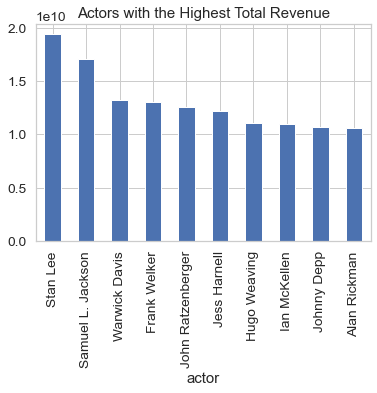

In [117]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

### 총수입이 가장 많은 감독들

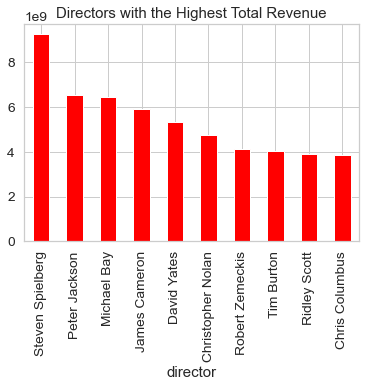

In [118]:
plt.title('Directors with the Highest Total Revenue')
df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
plt.show()

평균 수익에 대해서는 각각 최소 5편의 영화에 출연하고 연출한 배우와 감독만 고려하겠다.

In [119]:
actor_list = cast_df.groupby('actor')['revenue'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list >= 5].index)
director_list = df.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

### 평균 수입이 가장 높은 배우들

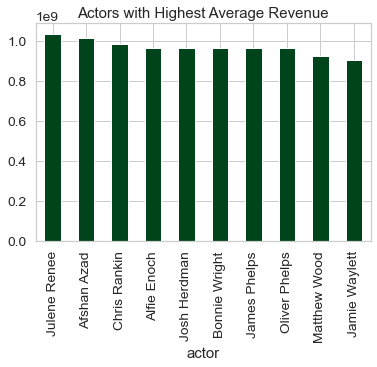

In [120]:
plt.title("Actors with Highest Average Revenue")
cast_df[cast_df['actor'].isin(actor_list)].groupby('actor')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='Greens_r')
plt.show()

### 평균 수입이 가장 높은 감독들

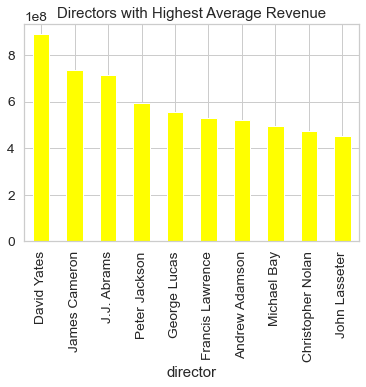

In [121]:
plt.title("Directors with Highest Average Revenue")
df[df['director'].isin(director_list)].groupby('director')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn_r')
plt.show()

그렇다면 어떤 배우와 감독이 가장 영화를 성공적으로 이끌 가능성이 있는가? 이를 위해 특정 감독이나 배우가 들여오는 평균 수익률을 고려해보겠다. 여기서는 적어도 천만 달러를 벌어들인 영화들만 고려할 것이고, 최소 5편의 영화에서 활동한 배우와 감독들만을 고려할 것이다.

### 가장 성공적인 배우들

In [122]:
success_df = cast_df[(cast_df['return'].notnull()) & (cast_df['revenue'] > 1e7) & (cast_df['actor'].isin(actor_list))]
pd.DataFrame(success_df.groupby('actor')['return'].mean().sort_values(ascending=False).head(10))

,return
actor,
Jami Gertz,3.099099e+06
Donna Mitchell,2.479289e+06
Andrew McCarthy,2.479280e+06
Nicholas Pryor,1.770914e+06
James Spader,1.549551e+06
Michael Bowen,1.033038e+06
Robert Downey Jr.,5.165189e+05
Martin Kove,3.395458e+05
William Zabka,3.395441e+05


### 가장 성공적인 감독들

In [123]:
success_df = df[(df['return'].notnull()) & (df['revenue'] > 1e7) & (df['director'].isin(director_list))]
pd.DataFrame(success_df.groupby('director')['return'].mean().sort_values(ascending=False).head(10))

,return
director,
John G. Avildsen,169822.750468
George A. Romero,60.656935
George Lucas,54.328446
Martha Coolidge,49.553131
Davis Guggenheim,46.243000
George Miller,39.076975
James Wan,27.659835
Guy Hamilton,25.779057
John Badham,25.433532


John G.Avildsen은 부자연스럽게 높은 수익률을 기록하고 있다. 명단에 있는 다른 감독들은 모두 그가 얻은 수익률 수준에는 전혀 미치지 못한다. 그렇다면 그의 영화들을 살펴보자.

In [124]:
df[(df['director'] == 'John G. Avildsen') & (df['return'].notnull())][['title', 'budget', 'revenue', 'return', 'year']]

,title,budget,revenue,return,year
1853,Rocky,1000000.0,117235147.0,1.172351e+02,1976.0
2307,Rocky V,42000000.0,119946358.0,2.855866e+00,1990.0
2315,The Karate Kid,8000000.0,90815558.0,1.135194e+01,1984.0
2316,"The Karate Kid, Part II",113.0,115103979.0,1.018619e+06,1986.0
5226,Joe,106000.0,19319254.0,1.822571e+02,1970.0
5658,Neighbors,8500000.0,29916207.0,3.519554e+00,1981.0


가라테 키드 2부는 예산이 113달러에 불과하다. 공식 집계에 따르면 이 영화의 제작비가 1300만 달러(약 1300억 원)라고 나와 있어 이례적인 일로 보인다.

우리는 여기서 탐색적 데이터 분석을 끝낼 것이다. 이 분석을 시작한 이유는 영화의 흥행을 예측하기 위해서 였지만, 이를 진행하기 보단 처음 목표했던 추천 시스템을 심화하는 방향으로 나아가기로 했다. 따라서 이번 분석에서 얻은 통찰력을 통해 유용한 예측 모델을 구축해 보자.